Number of sample in DATA = 3138156
sample rate : 44100


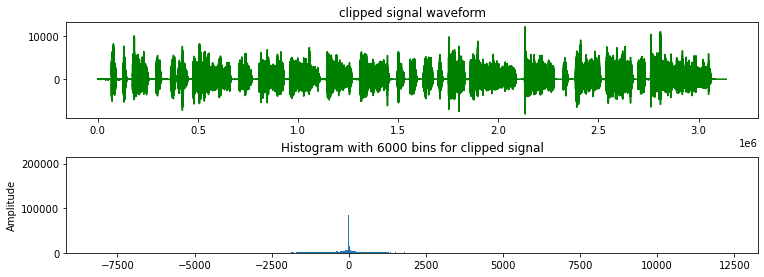

In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import os

sample_rate, data = wavfile.read('/home/auishik/Documents/audio_checking_experiment/should be dual speaker/5069.wav') # reading wave file.
#print ('All_data =',data)
print('Number of sample in DATA =',len(data))
print('sample rate :', sample_rate)
#print(f"number of channels = {data.shape[1]}")
plt.figure(figsize=(12,4))
plt.subplot(2, 1, 1)
plt.plot(data, color = 'green')
plt.title('clipped signal waveform')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

plt.subplot(2, 1, 2)
plt.hist(data , bins=6000, color = None)  # arguments are passed to np.histogram.
plt.title("Histogram with 6000 bins for clipped signal")
plt.ylabel('Amplitude')
plt.show()

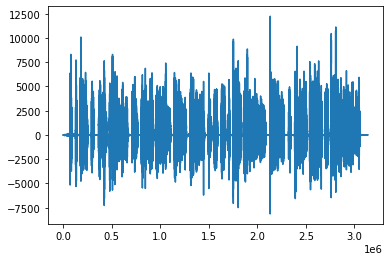

In [2]:
plt.plot(data)

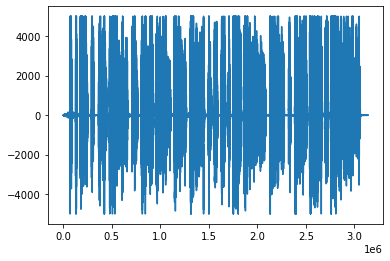

In [3]:
clipped = data.copy()
clipped[(clipped)>5000] = 5000
clipped[(clipped)<-5000] = -5000
plt.plot(clipped)

No. of points in each bin :  [1 0 0 ... 1 0 1]
Size of the bins          :  [-8136.     -8132.6045 -8129.209  ... 12230.209  12233.6045 12237.    ]


/tmp/ipykernel_26505/1147457357.py:2: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  hist, bin_edges = scipy.histogram(data, bins = 6000)


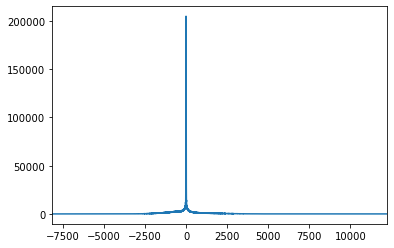

In [4]:
import scipy
hist, bin_edges = scipy.histogram(data, bins = 6000)
  
# Checking the results
print ("No. of points in each bin : ", hist)
print ("Size of the bins          : ", bin_edges)
  
# plotting the histogram
plt.plot(bin_edges[:-1], hist)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()

In [5]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

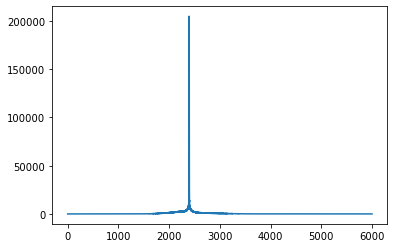

In [6]:
plt.plot(hist)

/tmp/ipykernel_26505/3757913830.py:1: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  plt.plot(scipy.histogram(clipped, bins = 6000)[0])


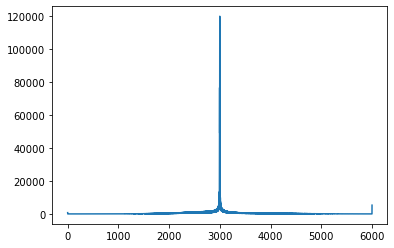

In [7]:
plt.plot(scipy.histogram(clipped, bins = 6000)[0])

In [8]:
fit1 = SimpleExpSmoothing(hist).fit(smoothing_level = 0.2, optimized = False)

fit2 = SimpleExpSmoothing(hist).fit(smoothing_level = 0.8, optimized = False)

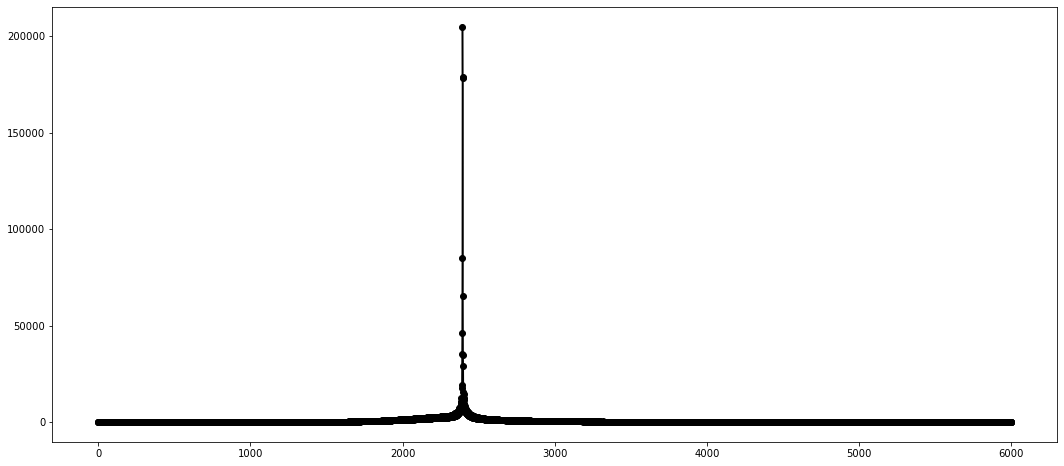

In [9]:
plt.figure(figsize=(18,8))
plt.plot(hist, marker = 'o', color = 'black')

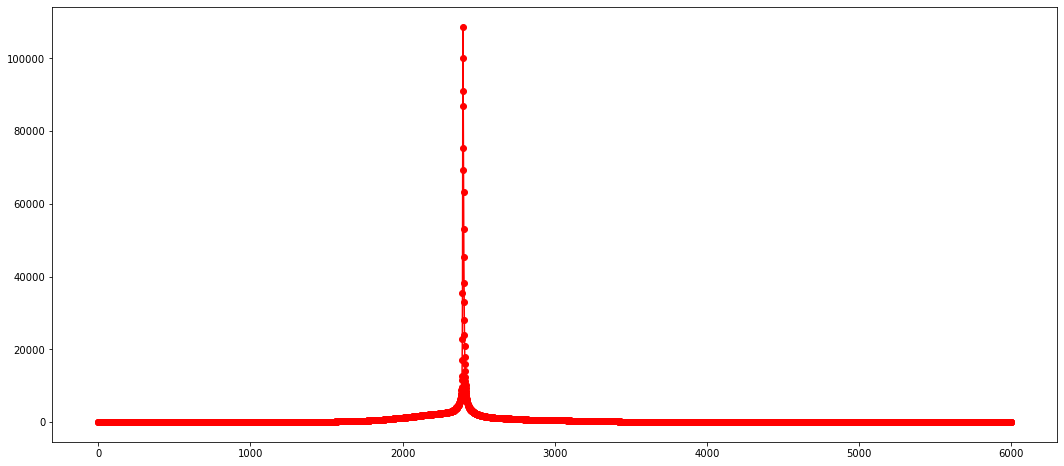

In [10]:
plt.figure(figsize=(18,8))
plt.plot(fit1.fittedvalues, marker = 'o', color = 'red')

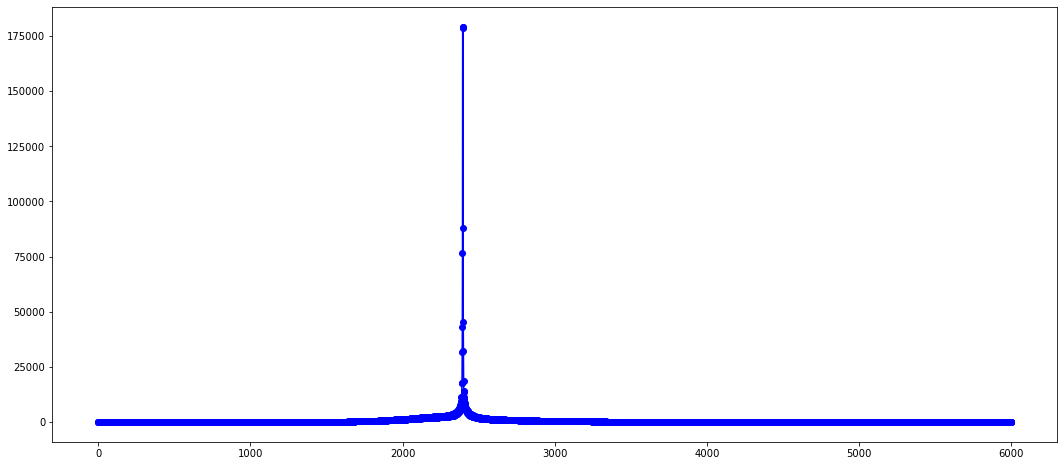

In [11]:
plt.figure(figsize=(18,8))
plt.plot(fit2.fittedvalues, marker = 'o', color = 'blue')

In [12]:
fit1 = SimpleExpSmoothing(hist[::-1]).fit(smoothing_level = 0.2, optimized = False)

fit2 = SimpleExpSmoothing(hist[::-1]).fit(smoothing_level = 0.8, optimized = False)

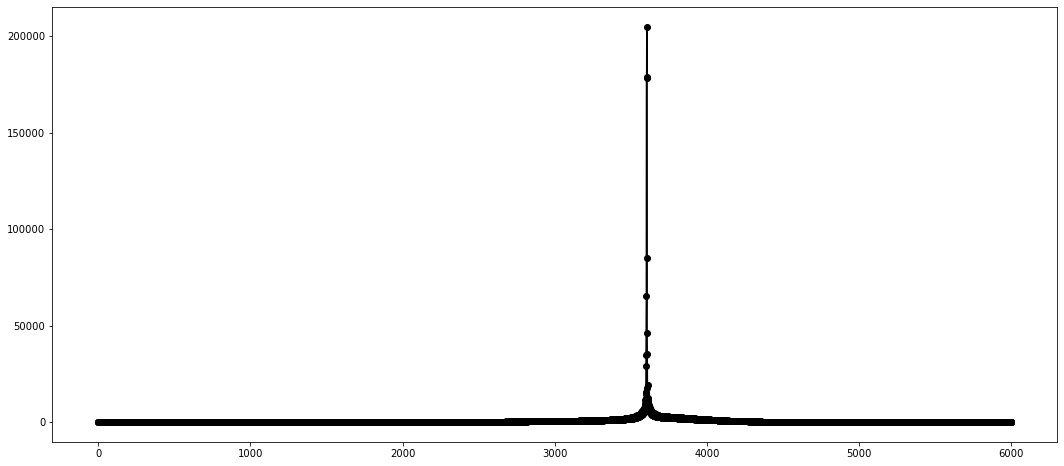

In [14]:
plt.figure(figsize=(18,8))
plt.plot(hist[::-1], marker = 'o', color = 'black')